# Project: Choosing the "right" $k$
There are two widely used methods to get a good value for $k$.
- The elbow method
- The silhouette coefficient

## The elbow method
- Make a chart over different $k$ values
- If the line chart resembles an arm, then the “elbow” is a good indication of a best fit at that point

### Step 1: Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

### Step 2: Generate data

In [2]:
data = np.random.randn(400,2)
data[:100] +=5,5
data[100:200] +=10,10
data[200:300] +=10,5
data[300:] += 5,10

### Step 3: Different $k$ values
- Create an empty list and assign it to **sse** (sum of squared error)
- Iterate over $k$ from 1 to 10 (both inclusive)
- Create a model **KMeans(n_cluster=k)**
- Fit the model with **data**
- Append the **model.inertia_** to the list **sse**

In [3]:
sse=[]
for k in range(1,11):
    model = KMeans(n_clusters=k,init='random',random_state=42,max_iter=10,n_init=1)
    model.fit(data)
    sse.append(model.inertia_)

### Step 4: Create plot
- Create a figure and axes (**fig, ax**) from Matplotlib.pyplot (**plt**)
- Make a plot over **range(1, 11)** and **sse**

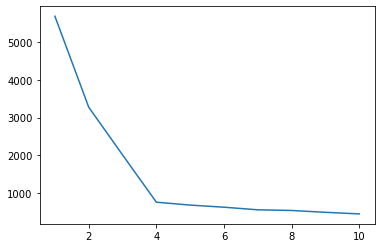

In [5]:
fig , ax = plt.subplots()
ax.plot(range(1,11),sse)

In [ ]:
# 4 gives elbow so 4 is more suitable

## The silhouette coefficient
- a measure of cluster cohesion and separation. 
- It quantifies how well a data point fits into its assigned cluster based on two factors:


- How close the data point is to other points in the cluster
- How far away the data point is from points in other clusters

### Step 1: Import libraries

In [6]:
from sklearn.metrics import silhouette_score

### Step 2: Calculate Silouette Coefficients
- Create an empty list and assign it **silouette_coefficients**
- Iterate $k$ over 2 to 10 (both inclusive)
    - Create **KMeans** model with **n_clusters=k**
    - Fit the model with **data**
    - Calculate the silhouette score on **data** and **model.labels_** and append it to list **silouette_coefficients**

In [7]:
silouette_coefficients = []
for k in range(2,11):
    model = KMeans(n_clusters=k,init='random',random_state=42,max_iter=10,n_init=1)
    model.fit(data)
    silouette_coefficients.append(silhouette_score(data,model.labels_))

### Step 3: Plot the result
- Create a figure and axes (**fig, ax**) from Matplotlib.pyplot (**plt**)
- Make a plot over **range(2, 11)** and **silhouette_coefficients**

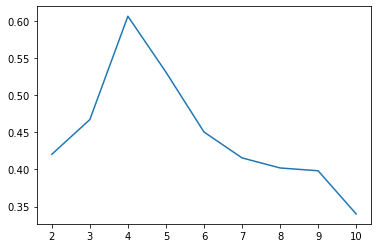

In [8]:
fig,ax = plt.subplots()
ax.plot(range(2,11),silouette_coefficients)